# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [1]:
!pip install pymongo

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install tweepy

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install twitter

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [6]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [7]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [8]:
client = MongoClient(mongod_connect)
db = client.gp31 # use or create a database named demo
tweet_collection = db.tweet_collection #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [11]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [12]:
track = ['covid19'] # define the keywords, tweets contain election

#locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [13]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

1326249545517428737
1326249546490519555
1326249546717007876
1326249546754760704
1326249547320987650
1326249548088565761
1326249548356984845
1326249548252123138
1326249548944007169
1326249549434810368
1326249550017929216
1326249550181507089
1326249550366044161
1326249550219255812
1326249550647058432
1326249550802251777
1326249550877765633
1326249550827446275
1326249551179767808
1326249551838277638
1326249551834062854
1326249552815542280
1326249553306275840
1326249553444663297
1326249553595674627
1326249553918636039
1326249553415319553
1326249550693142529
1326249554023383041
1326249554736541696
1326249555193704450
1326249555642392576
1326249556086976512
1326249557391511552
1326249557144064000
1326249558075117570
1326249558259732484
1326249558322655232
1326249559237009410
1326249559509659648
1326249559283163136
1326249560000372739
1326249559098527745
1326249560713420806
1326249560612679680
1326249561220853760
1326249561384513536
1326249561556471809
1326249561787133953
1326249562210754563


KeyboardInterrupt: 

## Use the REST API to Collect Tweets

Authorize the REST API 

In [14]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [15]:
count = 100 #number of returned tweets, default and max is 100
#geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "covid19"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [16]:
search_results = rest_api.search.tweets( count=count,q=q) 
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Tue Nov 10 19:46:47 +0000 2020'
'Tue Nov 10 19:46:47 +0000 2020'
'Tue Nov 10 19:46:46 +0000 2020'
'Tue Nov 10 19:46:46 +0000 2020'
'Tue Nov 10 19:46:46 +0000 2020'
'Tue Nov 10 19:46:46 +0000 2020'
'Tue Nov 10 19:46:46 +0000 2020'
'Tue Nov 10 19:46:46 +0000 2020'
'Tue Nov 10 19:46:45 +0000 2020'
'Tue Nov 10 19:46:45 +0000 2020'
'Tue Nov 10 19:46:45 +0000 2020'
'Tue Nov 10 19:46:45 +0000 2020'
'Tue Nov 10 19:46:45 +0000 2020'
'Tue Nov 10 19:46:44 +0000 2020'
'Tue Nov 10 19:46:44 +0000 2020'
'Tue Nov 10 19:46:44 +0000 2020'
'Tue Nov 10 19:46:44 +0000 2020'
'Tue Nov 10 19:46:43 +0000 2020'
'Tue Nov 10 19:46:43 +0000 2020'
'Tue Nov 10 19:46:43 +0000 2020'
'Tue Nov 10 19:46:43 +0000 2020'
'Tue Nov 10 19:46:43 +0000 2020'
'Tue Nov 10 19:46:42 +0000 2020'
'Tue Nov 10 19:46:42 +0000 2020'
'Tue Nov 10 19:46:42 +0000 2020'
'Tue Nov 10 19:46:42 +0000 2020'
'Tue Nov 10 19:46:41 +0000 2020'
'Tue Nov 10 19:46:41 +0000 2020'
'Tue Nov 10 19:46:41 +0000 2020'
'Tue Nov 10 19:46:41 +0000 2020'
'Tue Nov 1

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [17]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                        max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Tue Nov 10 19:46:26 +0000 2020'
'Tue Nov 10 19:46:26 +0000 2020'
'Tue Nov 10 19:46:26 +0000 2020'
'Tue Nov 10 19:46:25 +0000 2020'
'Tue Nov 10 19:46:25 +0000 2020'
'Tue Nov 10 19:46:25 +0000 2020'
'Tue Nov 10 19:46:25 +0000 2020'
'Tue Nov 10 19:46:25 +0000 2020'
'Tue Nov 10 19:46:24 +0000 2020'
'Tue Nov 10 19:46:24 +0000 2020'
'Tue Nov 10 19:46:24 +0000 2020'
'Tue Nov 10 19:46:24 +0000 2020'
'Tue Nov 10 19:46:24 +0000 2020'
'Tue Nov 10 19:46:23 +0000 2020'
'Tue Nov 10 19:46:22 +0000 2020'
'Tue Nov 10 19:46:22 +0000 2020'
'Tue Nov 10 19:46:22 +0000 2020'
'Tue Nov 10 19:46:22 +0000 2020'
'Tue Nov 10 19:46:22 +0000 2020'
'Tue Nov 10 19:46:22 +0000 2020'
'Tue Nov 10 19:46:22 +0000 2020'
'Tue Nov 10 19:46:21 +0000 2020'
'Tue Nov 10 19:46:21 +0000 2020'
'Tue Nov 10 19:46:21 +0000 2020'
'Tue Nov 10 19:46:21 +0000 2020'
'Tue Nov 10 19:46:20 +0000 2020'
'Tue Nov 10 19:46:20 +0000 2020'
'Tue Nov 10 19:46:20 +0000 2020'
'Tue Nov 10 19:46:20 +0000 2020'
'Tue Nov 10 19:46:20 +0000 2020'
'Tue Nov 1

'Tue Nov 10 19:45:26 +0000 2020'
'Tue Nov 10 19:45:26 +0000 2020'
'Tue Nov 10 19:45:26 +0000 2020'
'Tue Nov 10 19:45:26 +0000 2020'
'Tue Nov 10 19:45:26 +0000 2020'
'Tue Nov 10 19:45:25 +0000 2020'
'Tue Nov 10 19:45:25 +0000 2020'
'Tue Nov 10 19:45:25 +0000 2020'
'Tue Nov 10 19:45:25 +0000 2020'
'Tue Nov 10 19:45:25 +0000 2020'
'Tue Nov 10 19:45:24 +0000 2020'
'Tue Nov 10 19:45:24 +0000 2020'
'Tue Nov 10 19:45:24 +0000 2020'
'Tue Nov 10 19:45:23 +0000 2020'
'Tue Nov 10 19:45:23 +0000 2020'
'Tue Nov 10 19:45:23 +0000 2020'
'Tue Nov 10 19:45:22 +0000 2020'
'Tue Nov 10 19:45:22 +0000 2020'
'Tue Nov 10 19:45:22 +0000 2020'
'Tue Nov 10 19:45:22 +0000 2020'
'Tue Nov 10 19:45:22 +0000 2020'
'Tue Nov 10 19:45:22 +0000 2020'
'Tue Nov 10 19:45:22 +0000 2020'
'Tue Nov 10 19:45:21 +0000 2020'
'Tue Nov 10 19:45:13 +0000 2020'
'Tue Nov 10 19:45:06 +0000 2020'
'Tue Nov 10 19:45:06 +0000 2020'
'Tue Nov 10 19:45:06 +0000 2020'
'Tue Nov 10 19:45:06 +0000 2020'
'Tue Nov 10 19:45:06 +0000 2020'
'Tue Nov 1

'Tue Nov 10 19:44:15 +0000 2020'
'Tue Nov 10 19:44:15 +0000 2020'
'Tue Nov 10 19:44:15 +0000 2020'
'Tue Nov 10 19:44:15 +0000 2020'
'Tue Nov 10 19:44:14 +0000 2020'
'Tue Nov 10 19:44:14 +0000 2020'
'Tue Nov 10 19:44:14 +0000 2020'
'Tue Nov 10 19:44:14 +0000 2020'
'Tue Nov 10 19:44:13 +0000 2020'
'Tue Nov 10 19:44:13 +0000 2020'
'Tue Nov 10 19:44:13 +0000 2020'
'Tue Nov 10 19:44:12 +0000 2020'
'Tue Nov 10 19:44:11 +0000 2020'
'Tue Nov 10 19:44:11 +0000 2020'
'Tue Nov 10 19:44:11 +0000 2020'
'Tue Nov 10 19:44:10 +0000 2020'
'Tue Nov 10 19:44:10 +0000 2020'
'Tue Nov 10 19:44:10 +0000 2020'
'Tue Nov 10 19:44:10 +0000 2020'
'Tue Nov 10 19:44:09 +0000 2020'
'Tue Nov 10 19:44:09 +0000 2020'
'Tue Nov 10 19:44:09 +0000 2020'
'Tue Nov 10 19:44:09 +0000 2020'
'Tue Nov 10 19:44:09 +0000 2020'
'Tue Nov 10 19:44:08 +0000 2020'
'Tue Nov 10 19:44:08 +0000 2020'
'Tue Nov 10 19:44:08 +0000 2020'
'Tue Nov 10 19:44:08 +0000 2020'
'Tue Nov 10 19:44:08 +0000 2020'
'Tue Nov 10 19:44:08 +0000 2020'
'Tue Nov 1

'Tue Nov 10 19:43:23 +0000 2020'
'Tue Nov 10 19:43:23 +0000 2020'
'Tue Nov 10 19:43:23 +0000 2020'
'Tue Nov 10 19:43:23 +0000 2020'
'Tue Nov 10 19:43:23 +0000 2020'
'Tue Nov 10 19:43:22 +0000 2020'
'Tue Nov 10 19:43:22 +0000 2020'
'Tue Nov 10 19:43:22 +0000 2020'
'Tue Nov 10 19:43:22 +0000 2020'
'Tue Nov 10 19:43:22 +0000 2020'
'Tue Nov 10 19:43:21 +0000 2020'
'Tue Nov 10 19:43:21 +0000 2020'
'Tue Nov 10 19:43:21 +0000 2020'
'Tue Nov 10 19:43:21 +0000 2020'
'Tue Nov 10 19:43:20 +0000 2020'
'Tue Nov 10 19:43:20 +0000 2020'
'Tue Nov 10 19:43:20 +0000 2020'
'Tue Nov 10 19:43:20 +0000 2020'
'Tue Nov 10 19:43:20 +0000 2020'
'Tue Nov 10 19:43:20 +0000 2020'
'Tue Nov 10 19:43:20 +0000 2020'
'Tue Nov 10 19:43:20 +0000 2020'
'Tue Nov 10 19:43:20 +0000 2020'
'Tue Nov 10 19:43:20 +0000 2020'
'Tue Nov 10 19:43:19 +0000 2020'
'Tue Nov 10 19:43:19 +0000 2020'
'Tue Nov 10 19:43:19 +0000 2020'
'Tue Nov 10 19:43:19 +0000 2020'
'Tue Nov 10 19:43:19 +0000 2020'
'Tue Nov 10 19:43:19 +0000 2020'
'Tue Nov 1

'Tue Nov 10 19:42:36 +0000 2020'
'Tue Nov 10 19:42:36 +0000 2020'
'Tue Nov 10 19:42:36 +0000 2020'
'Tue Nov 10 19:42:36 +0000 2020'
'Tue Nov 10 19:42:36 +0000 2020'
'Tue Nov 10 19:42:36 +0000 2020'
'Tue Nov 10 19:42:36 +0000 2020'
'Tue Nov 10 19:42:36 +0000 2020'
'Tue Nov 10 19:42:35 +0000 2020'
'Tue Nov 10 19:42:35 +0000 2020'
'Tue Nov 10 19:42:35 +0000 2020'
'Tue Nov 10 19:42:35 +0000 2020'
'Tue Nov 10 19:42:35 +0000 2020'
'Tue Nov 10 19:42:35 +0000 2020'
'Tue Nov 10 19:42:35 +0000 2020'
'Tue Nov 10 19:42:34 +0000 2020'
'Tue Nov 10 19:42:34 +0000 2020'
'Tue Nov 10 19:42:34 +0000 2020'
'Tue Nov 10 19:42:34 +0000 2020'
'Tue Nov 10 19:42:34 +0000 2020'
'Tue Nov 10 19:42:34 +0000 2020'
'Tue Nov 10 19:42:34 +0000 2020'
'Tue Nov 10 19:42:33 +0000 2020'
'Tue Nov 10 19:42:33 +0000 2020'
'Tue Nov 10 19:42:33 +0000 2020'
'Tue Nov 10 19:42:33 +0000 2020'
'Tue Nov 10 19:42:33 +0000 2020'
'Tue Nov 10 19:42:32 +0000 2020'
'Tue Nov 10 19:42:32 +0000 2020'
'Tue Nov 10 19:42:31 +0000 2020'
'Tue Nov 1

'Tue Nov 10 19:41:41 +0000 2020'
'Tue Nov 10 19:41:41 +0000 2020'
'Tue Nov 10 19:41:41 +0000 2020'
'Tue Nov 10 19:41:40 +0000 2020'
'Tue Nov 10 19:41:40 +0000 2020'
'Tue Nov 10 19:41:40 +0000 2020'
'Tue Nov 10 19:41:40 +0000 2020'
'Tue Nov 10 19:41:40 +0000 2020'
'Tue Nov 10 19:41:39 +0000 2020'
'Tue Nov 10 19:41:39 +0000 2020'
'Tue Nov 10 19:41:39 +0000 2020'
'Tue Nov 10 19:41:39 +0000 2020'
'Tue Nov 10 19:41:39 +0000 2020'
'Tue Nov 10 19:41:39 +0000 2020'
'Tue Nov 10 19:41:39 +0000 2020'
'Tue Nov 10 19:41:39 +0000 2020'
'Tue Nov 10 19:41:39 +0000 2020'
'Tue Nov 10 19:41:38 +0000 2020'
'Tue Nov 10 19:41:38 +0000 2020'
'Tue Nov 10 19:41:37 +0000 2020'
'Tue Nov 10 19:41:37 +0000 2020'
'Tue Nov 10 19:41:37 +0000 2020'
'Tue Nov 10 19:41:37 +0000 2020'
'Tue Nov 10 19:41:37 +0000 2020'
'Tue Nov 10 19:41:37 +0000 2020'
'Tue Nov 10 19:41:37 +0000 2020'
'Tue Nov 10 19:41:36 +0000 2020'
'Tue Nov 10 19:41:36 +0000 2020'
'Tue Nov 10 19:41:36 +0000 2020'
'Tue Nov 10 19:41:35 +0000 2020'
'Tue Nov 1

'Tue Nov 10 19:40:46 +0000 2020'
'Tue Nov 10 19:40:46 +0000 2020'
'Tue Nov 10 19:40:46 +0000 2020'
'Tue Nov 10 19:40:46 +0000 2020'
'Tue Nov 10 19:40:46 +0000 2020'
'Tue Nov 10 19:40:46 +0000 2020'
'Tue Nov 10 19:40:46 +0000 2020'
'Tue Nov 10 19:40:46 +0000 2020'
'Tue Nov 10 19:40:45 +0000 2020'
'Tue Nov 10 19:40:45 +0000 2020'
'Tue Nov 10 19:40:45 +0000 2020'
'Tue Nov 10 19:40:44 +0000 2020'
'Tue Nov 10 19:40:43 +0000 2020'
'Tue Nov 10 19:40:43 +0000 2020'
'Tue Nov 10 19:40:43 +0000 2020'
'Tue Nov 10 19:40:43 +0000 2020'
'Tue Nov 10 19:40:43 +0000 2020'
'Tue Nov 10 19:40:42 +0000 2020'
'Tue Nov 10 19:40:42 +0000 2020'
'Tue Nov 10 19:40:42 +0000 2020'
'Tue Nov 10 19:40:42 +0000 2020'
'Tue Nov 10 19:40:42 +0000 2020'
'Tue Nov 10 19:40:41 +0000 2020'
'Tue Nov 10 19:40:41 +0000 2020'
'Tue Nov 10 19:40:41 +0000 2020'
'Tue Nov 10 19:40:41 +0000 2020'
'Tue Nov 10 19:40:41 +0000 2020'
'Tue Nov 10 19:40:41 +0000 2020'
'Tue Nov 10 19:40:40 +0000 2020'
'Tue Nov 10 19:40:40 +0000 2020'
'Tue Nov 1

'Tue Nov 10 19:39:48 +0000 2020'
'Tue Nov 10 19:39:48 +0000 2020'
'Tue Nov 10 19:39:48 +0000 2020'
'Tue Nov 10 19:39:48 +0000 2020'
'Tue Nov 10 19:39:48 +0000 2020'
'Tue Nov 10 19:39:47 +0000 2020'
'Tue Nov 10 19:39:47 +0000 2020'
'Tue Nov 10 19:39:47 +0000 2020'
'Tue Nov 10 19:39:47 +0000 2020'
'Tue Nov 10 19:39:47 +0000 2020'
'Tue Nov 10 19:39:46 +0000 2020'
'Tue Nov 10 19:39:46 +0000 2020'
'Tue Nov 10 19:39:46 +0000 2020'
'Tue Nov 10 19:39:46 +0000 2020'
'Tue Nov 10 19:39:45 +0000 2020'
'Tue Nov 10 19:39:45 +0000 2020'
'Tue Nov 10 19:39:45 +0000 2020'
'Tue Nov 10 19:39:44 +0000 2020'
'Tue Nov 10 19:39:44 +0000 2020'
'Tue Nov 10 19:39:44 +0000 2020'
'Tue Nov 10 19:39:43 +0000 2020'
'Tue Nov 10 19:39:43 +0000 2020'
'Tue Nov 10 19:39:43 +0000 2020'
'Tue Nov 10 19:39:42 +0000 2020'
'Tue Nov 10 19:39:42 +0000 2020'
'Tue Nov 10 19:39:42 +0000 2020'
'Tue Nov 10 19:39:41 +0000 2020'
'Tue Nov 10 19:39:41 +0000 2020'
'Tue Nov 10 19:39:41 +0000 2020'
'Tue Nov 10 19:39:40 +0000 2020'
'Tue Nov 1

'Tue Nov 10 19:38:53 +0000 2020'
'Tue Nov 10 19:38:52 +0000 2020'
'Tue Nov 10 19:38:52 +0000 2020'
'Tue Nov 10 19:38:52 +0000 2020'
'Tue Nov 10 19:38:52 +0000 2020'
'Tue Nov 10 19:38:52 +0000 2020'
'Tue Nov 10 19:38:52 +0000 2020'
'Tue Nov 10 19:38:51 +0000 2020'
'Tue Nov 10 19:38:51 +0000 2020'
'Tue Nov 10 19:38:51 +0000 2020'
'Tue Nov 10 19:38:51 +0000 2020'
'Tue Nov 10 19:38:51 +0000 2020'
'Tue Nov 10 19:38:51 +0000 2020'
'Tue Nov 10 19:38:51 +0000 2020'
'Tue Nov 10 19:38:51 +0000 2020'
'Tue Nov 10 19:38:50 +0000 2020'
'Tue Nov 10 19:38:50 +0000 2020'
'Tue Nov 10 19:38:50 +0000 2020'
'Tue Nov 10 19:38:50 +0000 2020'
'Tue Nov 10 19:38:50 +0000 2020'
'Tue Nov 10 19:38:50 +0000 2020'
'Tue Nov 10 19:38:50 +0000 2020'
'Tue Nov 10 19:38:50 +0000 2020'
'Tue Nov 10 19:38:49 +0000 2020'
'Tue Nov 10 19:38:49 +0000 2020'
'Tue Nov 10 19:38:49 +0000 2020'
'Tue Nov 10 19:38:49 +0000 2020'
'Tue Nov 10 19:38:49 +0000 2020'
'Tue Nov 10 19:38:49 +0000 2020'
'Tue Nov 10 19:38:49 +0000 2020'
'Tue Nov 1

'Tue Nov 10 19:37:58 +0000 2020'
'Tue Nov 10 19:37:58 +0000 2020'
'Tue Nov 10 19:37:58 +0000 2020'
'Tue Nov 10 19:37:58 +0000 2020'
'Tue Nov 10 19:37:57 +0000 2020'
'Tue Nov 10 19:37:57 +0000 2020'
'Tue Nov 10 19:37:57 +0000 2020'
'Tue Nov 10 19:37:57 +0000 2020'
'Tue Nov 10 19:37:57 +0000 2020'
'Tue Nov 10 19:37:57 +0000 2020'
'Tue Nov 10 19:37:56 +0000 2020'
'Tue Nov 10 19:37:56 +0000 2020'
'Tue Nov 10 19:37:56 +0000 2020'
'Tue Nov 10 19:37:56 +0000 2020'
'Tue Nov 10 19:37:56 +0000 2020'
'Tue Nov 10 19:37:55 +0000 2020'
'Tue Nov 10 19:37:55 +0000 2020'
'Tue Nov 10 19:37:55 +0000 2020'
'Tue Nov 10 19:37:55 +0000 2020'
'Tue Nov 10 19:37:54 +0000 2020'
'Tue Nov 10 19:37:54 +0000 2020'
'Tue Nov 10 19:37:54 +0000 2020'
'Tue Nov 10 19:37:54 +0000 2020'
'Tue Nov 10 19:37:53 +0000 2020'
'Tue Nov 10 19:37:53 +0000 2020'
'Tue Nov 10 19:37:53 +0000 2020'
'Tue Nov 10 19:37:53 +0000 2020'
'Tue Nov 10 19:37:53 +0000 2020'
'Tue Nov 10 19:37:53 +0000 2020'
'Tue Nov 10 19:37:53 +0000 2020'
'Tue Nov 1

'Tue Nov 10 19:37:07 +0000 2020'
'Tue Nov 10 19:37:06 +0000 2020'
'Tue Nov 10 19:37:06 +0000 2020'
'Tue Nov 10 19:37:06 +0000 2020'
'Tue Nov 10 19:37:06 +0000 2020'
'Tue Nov 10 19:37:05 +0000 2020'
'Tue Nov 10 19:37:05 +0000 2020'
'Tue Nov 10 19:37:05 +0000 2020'
'Tue Nov 10 19:37:05 +0000 2020'
'Tue Nov 10 19:37:05 +0000 2020'
'Tue Nov 10 19:37:05 +0000 2020'
'Tue Nov 10 19:37:05 +0000 2020'
'Tue Nov 10 19:37:05 +0000 2020'
'Tue Nov 10 19:37:05 +0000 2020'
'Tue Nov 10 19:37:04 +0000 2020'
'Tue Nov 10 19:37:03 +0000 2020'
'Tue Nov 10 19:37:03 +0000 2020'
'Tue Nov 10 19:37:03 +0000 2020'
'Tue Nov 10 19:37:02 +0000 2020'
'Tue Nov 10 19:37:02 +0000 2020'
'Tue Nov 10 19:37:02 +0000 2020'
'Tue Nov 10 19:37:02 +0000 2020'
'Tue Nov 10 19:37:02 +0000 2020'
'Tue Nov 10 19:37:01 +0000 2020'
'Tue Nov 10 19:37:01 +0000 2020'
'Tue Nov 10 19:37:00 +0000 2020'
'Tue Nov 10 19:37:00 +0000 2020'
'Tue Nov 10 19:37:00 +0000 2020'
'Tue Nov 10 19:37:00 +0000 2020'
'Tue Nov 10 19:37:00 +0000 2020'
'Tue Nov 1

'Tue Nov 10 19:36:09 +0000 2020'
'Tue Nov 10 19:36:09 +0000 2020'
'Tue Nov 10 19:36:09 +0000 2020'
'Tue Nov 10 19:36:09 +0000 2020'
'Tue Nov 10 19:36:08 +0000 2020'
'Tue Nov 10 19:36:08 +0000 2020'
'Tue Nov 10 19:36:08 +0000 2020'
'Tue Nov 10 19:36:08 +0000 2020'
'Tue Nov 10 19:36:07 +0000 2020'
'Tue Nov 10 19:36:07 +0000 2020'
'Tue Nov 10 19:36:07 +0000 2020'
'Tue Nov 10 19:36:07 +0000 2020'
'Tue Nov 10 19:36:07 +0000 2020'
'Tue Nov 10 19:36:07 +0000 2020'
'Tue Nov 10 19:36:07 +0000 2020'
'Tue Nov 10 19:36:07 +0000 2020'
'Tue Nov 10 19:36:06 +0000 2020'
'Tue Nov 10 19:36:06 +0000 2020'
'Tue Nov 10 19:36:05 +0000 2020'
'Tue Nov 10 19:36:05 +0000 2020'
'Tue Nov 10 19:36:05 +0000 2020'
'Tue Nov 10 19:36:05 +0000 2020'
'Tue Nov 10 19:36:04 +0000 2020'
'Tue Nov 10 19:36:04 +0000 2020'
'Tue Nov 10 19:36:04 +0000 2020'
'Tue Nov 10 19:36:04 +0000 2020'
'Tue Nov 10 19:36:04 +0000 2020'
'Tue Nov 10 19:36:04 +0000 2020'
'Tue Nov 10 19:36:03 +0000 2020'
'Tue Nov 10 19:36:03 +0000 2020'
'Tue Nov 1

'Tue Nov 10 19:35:17 +0000 2020'
'Tue Nov 10 19:35:17 +0000 2020'
'Tue Nov 10 19:35:17 +0000 2020'
'Tue Nov 10 19:35:17 +0000 2020'
'Tue Nov 10 19:35:16 +0000 2020'
'Tue Nov 10 19:35:16 +0000 2020'
'Tue Nov 10 19:35:16 +0000 2020'
'Tue Nov 10 19:35:16 +0000 2020'
'Tue Nov 10 19:35:16 +0000 2020'
'Tue Nov 10 19:35:16 +0000 2020'
'Tue Nov 10 19:35:15 +0000 2020'
'Tue Nov 10 19:35:15 +0000 2020'
'Tue Nov 10 19:35:15 +0000 2020'
'Tue Nov 10 19:35:15 +0000 2020'
'Tue Nov 10 19:35:14 +0000 2020'
'Tue Nov 10 19:35:14 +0000 2020'
'Tue Nov 10 19:35:14 +0000 2020'
'Tue Nov 10 19:35:14 +0000 2020'
'Tue Nov 10 19:35:14 +0000 2020'
'Tue Nov 10 19:35:13 +0000 2020'
'Tue Nov 10 19:35:13 +0000 2020'
'Tue Nov 10 19:35:13 +0000 2020'
'Tue Nov 10 19:35:13 +0000 2020'
'Tue Nov 10 19:35:12 +0000 2020'
'Tue Nov 10 19:35:12 +0000 2020'
'Tue Nov 10 19:35:12 +0000 2020'
'Tue Nov 10 19:35:12 +0000 2020'
'Tue Nov 10 19:35:11 +0000 2020'
'Tue Nov 10 19:35:11 +0000 2020'
'Tue Nov 10 19:35:11 +0000 2020'
'Tue Nov 1

KeyboardInterrupt: 

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [18]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

7687
6919


Create a text index and print the Tweets containing specific keywords. 

In [19]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [23]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "election"}}) # return tweets contain vote

Use pprint to display tweets

In [24]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')

        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: Dr. #WearAMask Green MD
text: RT @bethlinas: While some are upset about the election, it is unconscionable for ANY of our elected leaders to placate this admin while upw…
----
name: crouchingTiger(); 🏴󠁧󠁢󠁷󠁬󠁳󠁿
text: So uhh, has Mike Pence gone into hiding now?

#elections #election #Election2020 #whereismikepence
----
name: Special K
text: @realDonaldTrump They had to pump up the polls ahead of the election to make their post election fraud more plausible.
----
name: Beth S. Linas, PhD, MHS (she/her)
text: While some are upset about the election, it is unconscionable for ANY of our elected leaders to placate this admin… https://t.co/V4eHRSwTtB
----
name: Kellen Squire
text: @OldDominionPost No, he did that before the election was called by the media. Now that this election has been calle… https://t.co/iIQ0EyLiu0
----
name: MaryAnn O'Neill 🇱🇷
text: RT @sattfly: This is not just the most important election in American history, it is the most important election in
WORLD🌎 history.

In [25]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "election"}}) # return tweets contain vote

Use pandas to display tweets

In [26]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,reply_count,filter_level,timestamp_ms,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,extended_tweet,extended_entities
0,5faaee7930765ecaaa07a676,Tue Nov 10 19:46:18 +0000 2020,1326249846421024770,1326249846421024770,RT @bethlinas: While some are upset about the ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5faae6aea2ec50aecec0540d,Mon Nov 09 22:54:10 +0000 2020,1325934734959112198,1325934734959112198,"So uhh, has Mike Pence gone into hiding now?\n...",False,"{'hashtags': [{'text': 'elections', 'indices':...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5faae4cca2ec50aecec0450c,Tue Nov 10 19:06:47 +0000 2020,1326239902107922432,1326239902107922432,@realDonaldTrump They had to pump up the polls...,False,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",1.325961e+18,...,0.0,low,1605035207665,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5faaee8230765ecaaa07a938,Tue Nov 10 19:43:58 +0000 2020,1326249260745191426,1326249260745191426,"While some are upset about the election, it is...",True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN
4,5faae6aba2ec50aecec053ba,Mon Nov 09 23:25:32 +0000 2020,1325942631608836096,1325942631608836096,"@OldDominionPost No, he did that before the el...",True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.325942e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5faae679a2ec50aecec04b73,Tue Nov 10 14:26:53 +0000 2020,1326169463121711105,1326169463121711105,RT @sattfly: This is not just the most importa...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5faae688a2ec50aecec04db9,Tue Nov 10 03:43:21 +0000 2020,1326007511225339907,1326007511225339907,The time to talk about coup things was BEFORE ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.326007e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5faae66aa2ec50aecec04814,Tue Nov 10 17:30:10 +0000 2020,1326215586926485505,1326215586926485505,At least the election workers in Michigan got ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN
8,5faae4cfa2ec50aecec0458a,Tue Nov 10 19:06:50 +0000 2020,1326239912010674179,1326239912010674179,RT @finneas: now that trump has lost the elect...,False,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0.0,low,1605035210026,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5faae4cfa2ec50aecec04585,Tue Nov 10 19:06:49 +0000 2020,1326239911666618368,1326239911666618368,RT @AJC4others: The conflict of interest estab...,False,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,"<a href=""http://twitter.com/download/android"" ...",NaN,...,0.0,low,1605035209944,NaN,1.325580e+18,1325580261648576512,{'created_at': 'Sun Nov 08 23:25:37 +0000 2020...,"{'url': 'https://t.co/wL843JnDXK', 'expanded':...",NaN,NaN


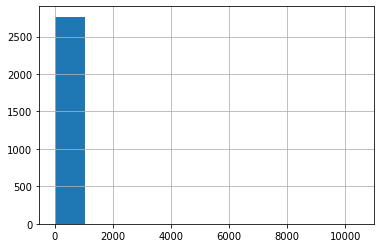

In [27]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count